<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/4-Data-Analysis/61-prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

In [ ]:
import prophet
print(prophet.__version__)


In [ ]:
df = pd.read_excel('BBB.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
df.head()

In [4]:
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [ ]:
df.head()

In [5]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [6]:
df_day.index

RangeIndex(start=0, stop=337, step=1)

In [7]:
df_day.drop(df_day.index[336], inplace=True)

In [8]:
df_day.tail()

,ds,y
331,2020-03-27,8176.44
332,2020-03-28,4907.76
333,2020-03-29,4293.60
334,2020-03-30,9195.84
335,2020-03-31,8639.76


In [9]:
m = Prophet(yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True, uncertainty_samples=1000)

In [10]:
m.fit(df_day)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx313us26/ctf31698.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx313us26/nlk6zv_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54924', 'data', 'file=/tmp/tmpx313us26/ctf31698.json', 'init=/tmp/tmpx313us26/nlk6zv_6.json', 'output', 'file=/tmp/tmpx313us26/prophet_modelpej3or5a/prophet_model-20240418074551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
future = m.make_future_dataframe(30, freq='D') # Forecasting 7 days

In [12]:
future.tail(30)

,ds
336,2020-04-01
337,2020-04-02
338,2020-04-03
339,2020-04-04
340,2020-04-05
341,2020-04-06
342,2020-04-07
343,2020-04-08
344,2020-04-09
345,2020-04-10


In [13]:
forecast = m.predict(future)

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
361,2020-04-26,4269.445142,1847.597284,6534.454589
362,2020-04-27,11903.373874,9534.334986,14360.837612
363,2020-04-28,12080.257141,9876.827443,14234.187504
364,2020-04-29,11225.220560,8861.060831,13600.861645
365,2020-04-30,11201.763295,9010.913653,13436.295715


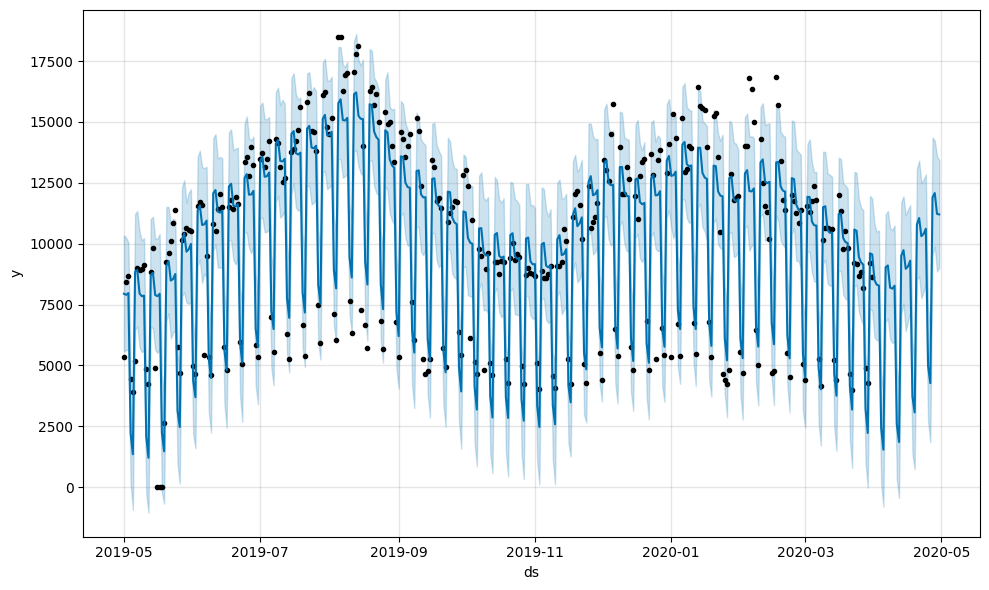

In [15]:
fig1 = m.plot(forecast)

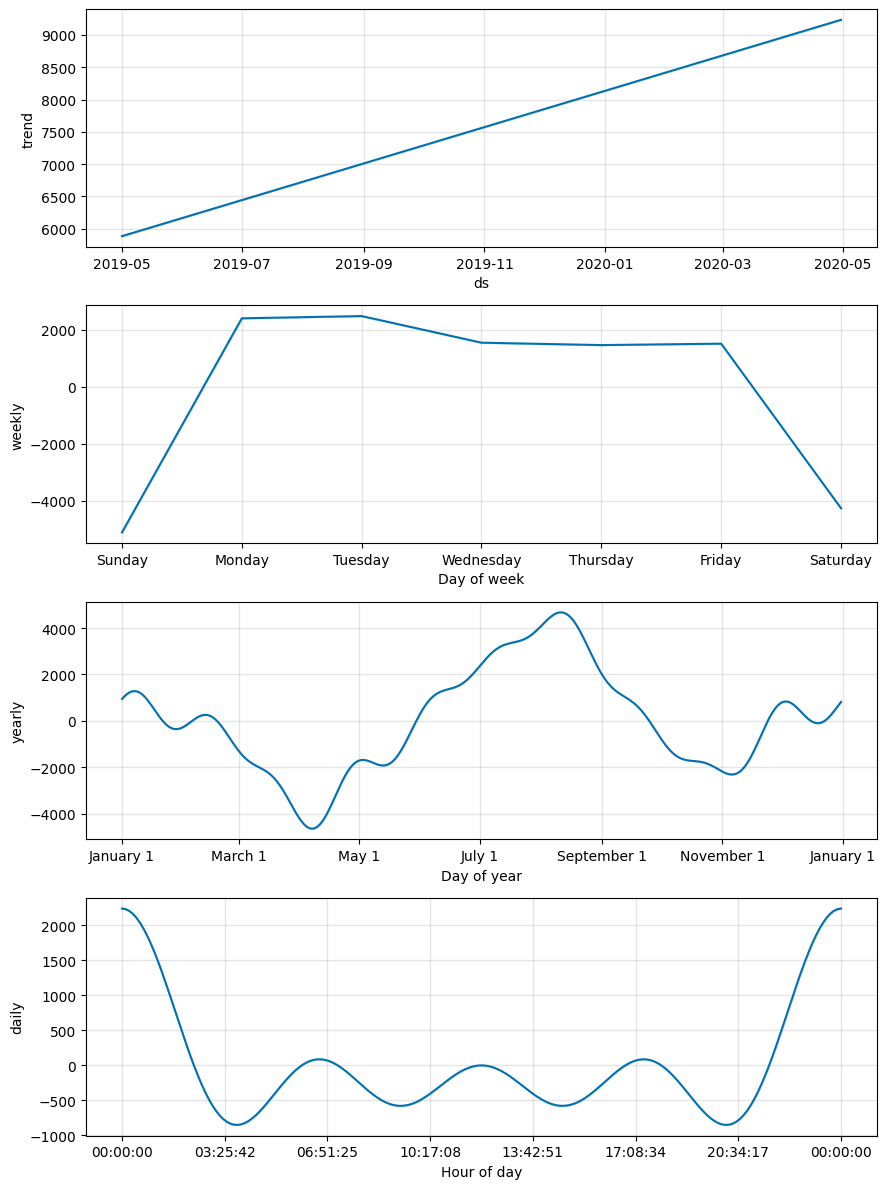

In [16]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [ ]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)